<a href="https://colab.research.google.com/github/greensky0107/self_study/blob/main/Day3_%EC%B6%94%EB%A1%A0%ED%86%B5%EA%B3%84%EC%8B%AC%ED%99%94(A_B_test)_%EC%B5%9C%EC%88%99%EC%96%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.ÎåÄÏàòÏùò Î≤ïÏπô
- ÎèôÏ†ÑÎçòÏßÄÍ∏∞Ïùò ÏòàÏãúÏóêÏÑú ÏãúÌñâÏù¥ ÎßéÏïÑÏßàÏàòÎ°ù ÎπÑÏú®(ÌèâÍ∑†)ÏùÄ Ïù¥Î°†Ï†ÅÏù∏ ÏàòÏπòÏù∏ 0.5Ïóê Í∞ÄÍπåÏõåÏßê

(ÎåÄÏàòÏùò Î≤ïÏπôÏùò ÌïµÏã¨ Î©îÏãúÏßÄ => ÌëúÎ≥∏Ïùò ÏàòÍ∞Ä ÎßéÏùÑ ÏàòÎ°ù ÌÜµÍ≥Ñ Ï∂îÏ†ïÏù¥ Ï†ïÌôïÌï¥ÏßÑÎã§.  ÌëúÎ≥∏Ïù¥ Î™®ÏßëÎã®ÏùÑ ÎåÄÌëúÌï† Ïàò ÏûàÎã§.)

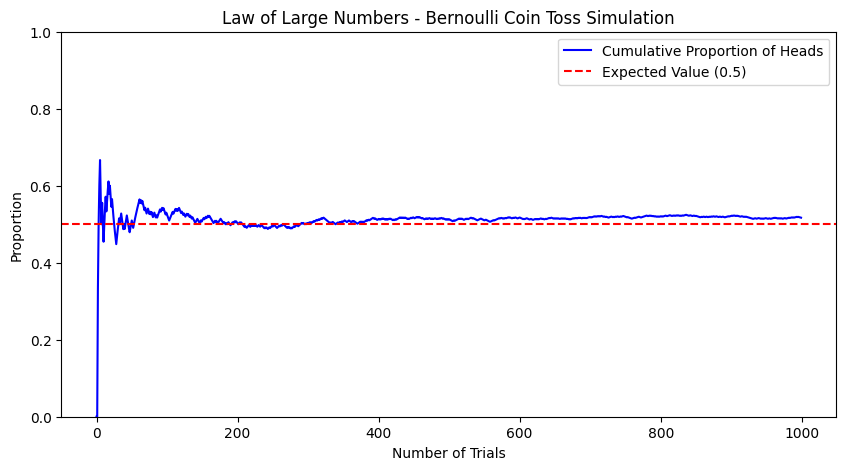

In [ ]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def law_of_large_numbers(trials, p=0.5):
    results = bernoulli.rvs(p, size=trials)  # Bernoulli Î∂ÑÌè¨Î•º Ïù¥Ïö©Ìïú ÎèôÏ†Ñ ÎçòÏßÄÍ∏∞ ÏãúÌñâ
    cumulative_mean = np.cumsum(results) / np.arange(1, trials + 1)  # ÎàÑÏ†Å ÌèâÍ∑† Í≥ÑÏÇ∞

    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_mean, label="Cumulative Proportion of Heads", color="blue")
    plt.axhline(y=p, color="red", linestyle="dashed", label="Expected Value (0.5)")
    plt.xlabel("Number of Trials")
    plt.ylabel("Proportion")
    plt.title("Law of Large Numbers - Bernoulli Coin Toss Simulation")
    plt.legend()
    plt.ylim(0,1)
    plt.show()

# 1,000Î≤àÏùò ÏãúÌñâ
law_of_large_numbers(1000)

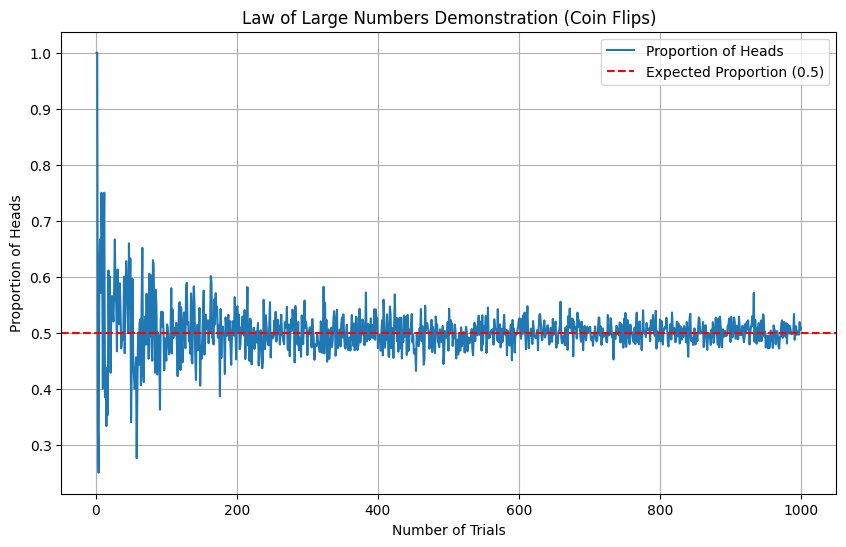

In [ ]:
# Í∞ïÏÇ¨Îãò Ï†ïÎãµ
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

def law_of_large_numbers(n_trials):
    proportions = []
    for i in range(1, n_trials + 1):
        # Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨ÏóêÏÑú ÏÉòÌîå ÏÉùÏÑ± (p=0.5)
        flips = bernoulli.rvs(p=0.5, size=i)  # 0: tails, 1: heads
        heads_count = np.sum(flips)  # ÏïûÎ©¥(1)Ïùò Í∞úÏàò
        proportions.append(heads_count / i)  # ÏïûÎ©¥Ïùò ÎπÑÏú® Í≥ÑÏÇ∞

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_trials + 1), proportions, label="Proportion of Heads")
    plt.axhline(y=0.5, color='r', linestyle='--', label='Expected Proportion (0.5)')
    plt.xlabel('Number of Trials')
    plt.ylabel('Proportion of Heads')
    plt.title('Law of Large Numbers Demonstration (Coin Flips)')
    plt.legend()
    plt.grid(True)
    plt.show()

# 1,000Î≤àÏùò ÏãúÌñâ
law_of_large_numbers(1000)

## 2.Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨(CLT, Central Limit Theory)
- Ïñ¥Îñ§ Î∂ÑÌè¨Ïù¥Îçò ÌëúÎ≥∏Ï∂îÏ∂úÌïú ÌÜµÍ≥ÑÎüâ(ex ÌèâÍ∑†)ÏùÄ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨Î•º Îç∞Ïù¥ÌÑ∞Î°ú Ïû¨ÌòÑÌï¥Î¥ÖÏãúÎã§.

(Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨Ïùò ÌïµÏã¨ Î©îÏÑ∏ÏßÄ => Ïù¥Îü¨Í∏∞ ÏúÑÌï¥ÏÑúÎäî ÌëúÎ≥∏Ïùò ÌÅ¨Í∏∞Í∞Ä Ï∂©Î∂ÑÌûà Ïª§Ïïº ÌïúÎã§.    Ï∂©Î∂ÑÌûà Ïª§ÏïºÌïúÎã§Îäî Í≤å ÌïµÏã¨.)  ÌëúÎ≥∏Ïù¥ Î™®ÏßëÎã®ÏùÑ ÎåÄÌëúÌï† Ïàò ÏûàÎã§.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from scipy import stats
from scipy.stats import binom, uniform, norm

#### Q1) CLT: Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±(ÌïòÏúÑ Î¨∏Ï†ú4Í∞ú)

-  scipy.stats Î™®ÎìàÏóêÏÑú Îã§Ïùå Î∂ÑÌè¨Î•º ÏÉùÏÑ±ÌïòÍ≥† ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÌëúÌòÑÌïòÍ∏∞(subplotsÍ∂åÏû•)

- Q1-1) Ïù¥Ìï≠ Î∂ÑÌè¨ ÏÉòÌîå Î≥ÄÏàòÎ™Ö `binomial_data`: ÌôïÎ•† 0.5Ïùò ÏãúÌñâÏùÑ 10Î≤à ÏãúÌñâÌñàÏùÑÎïå ÏÑ±Í≥µÌï† Í∞ØÏàòÏùò 1000Í∞úÏùò ÌëúÎ≥∏
    - ex ÎèôÏ†Ñ 10Î≤à ÎçòÏ°åÏùÑÎïå ÏïûÎ©¥Ïù¥ ÎÇòÏò¨ Ïàò ÏûàÎäî ÏàòÎäî 0Î∂ÄÌÑ∞ 10Í∞ú
- Q1-2) Í∑†Îì± Î∂ÑÌè¨ ÏÉòÌîå Î≥ÄÏàòÎ™Ö `uniform_data` : ÏãúÏûë 0, ÎÅù 10Ïùò ÌëúÎ≥∏ 1000Í∞ú ÏÉùÏÑ±
- Q1-3) Ï†ïÍ∑ú Î∂ÑÌè¨ ÏÉòÌîå Î≥ÄÏàòÎ™Ö `normal_data` :  ÌèâÍ∑†0, ÌëúÏ§ÄÌé∏Ï∞® 1Ïùò ÌëúÎ≥∏ 1000Í∞ú ÏÉùÏÑ±
- Q1-4) ÏúÑ Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÌëúÌòÑÌïòÎêò plt.subplots(1,3)ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÎèôÏãúÏóê ÌëúÌòÑÌïòÍ≥†, `bins`Îäî 20Í∞úÎ°ú ÏÑ§Ï†ï

Ïù¥Ìï≠Î∂ÑÌè¨ Îç∞Ïù¥ÌÑ∞Ïùò ÏòàÏãú [4 8 6 5 3]
Í∑†Îì±Î∂ÑÌè¨ Îç∞Ïù¥ÌÑ∞Ïùò ÏòàÏãú [1.85132929 5.41900947 8.72945836 7.32224886 8.06561148]
Ï†ïÍ∑úÎ∂ÑÌè¨ Îç∞Ïù¥ÌÑ∞Ïùò ÏòàÏãú [-0.87798259 -0.82688035 -0.22647889  0.36736551  0.91358463]


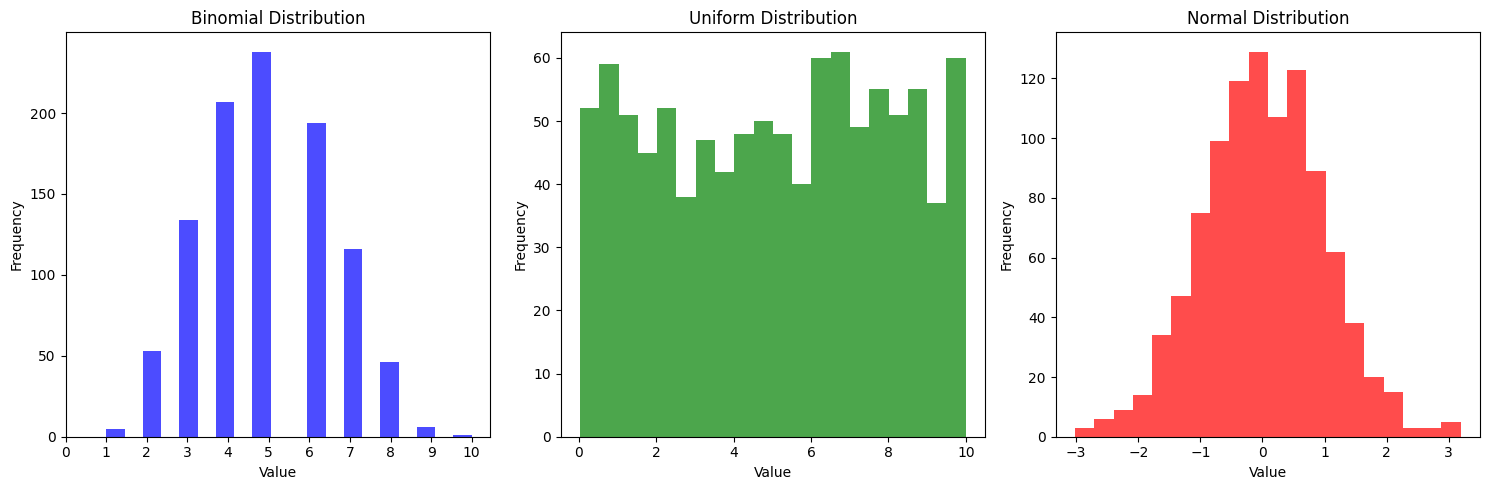

In [ ]:
np.random.seed(42)

# scipyÎ•º ÌÜµÌïú ÏÉòÌîå ÏÉùÏÑ±
binomial_data = binom.rvs(n=10, p=0.5, size=1000)  # Ïù¥Ìï≠ Î∂ÑÌè¨ (n=10, p=0.5, sample=1000)
uniform_data = uniform.rvs(loc=0, scale=10, size=1000)  # Í∑†Îì± Î∂ÑÌè¨ (0~10, sample=1000)
normal_data = norm.rvs(loc=0, scale=1, size=1000)  # Ï†ïÍ∑ú Î∂ÑÌè¨ (mean=0, std=1, sample=1000)

print(f'Ïù¥Ìï≠Î∂ÑÌè¨ Îç∞Ïù¥ÌÑ∞Ïùò ÏòàÏãú {binomial_data[:5]}')
print(f'Í∑†Îì±Î∂ÑÌè¨ Îç∞Ïù¥ÌÑ∞Ïùò ÏòàÏãú {uniform_data[:5]}')
print(f'Ï†ïÍ∑úÎ∂ÑÌè¨ Îç∞Ïù¥ÌÑ∞Ïùò ÏòàÏãú {normal_data[:5]}')

#ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(binomial_data, bins = 20, color = 'blue', alpha = 0.7)
plt.xticks(range(0,11))
plt.title("Binomial Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")


plt.subplot(1, 3, 2)
plt.hist(uniform_data, bins = 20, color = 'green', alpha = 0.7)
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(normal_data, bins = 20, color = 'red', alpha = 0.7)
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Q2) CLT: Í∞Å Î∂ÑÌè¨Ïùò ÌëúÎ≥∏ ÌèâÍ∑† ÏãúÍ∞ÅÌôî
`Numpy.choice`Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Í∞Å Î∂ÑÌè¨(ex `bionmial_data`ÏóêÏÑú 30Í∞úÏî© ÎΩëÏïÑ ÌèâÍ∑†ÏùÑ ÎÇ¥Í≥† Ïù¥Î•º 500Î≤à Î∞òÎ≥µÌïòÏó¨ ÌëúÎ≥∏ ÌèâÍ∑†ÏùÑ ÏÉùÏÑ±Ìï¥ Î¥ÖÏãúÎã§. ÌëúÎ≥∏Ïùò ÌèâÍ∑†Îì§ÏùÑ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÏãúÍ∞ÅÌôîÏó¨ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÎäîÏßÄ ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§.

- `num_samples`: ÌëúÎ≥∏Ï∂îÏ∂úÌï† ÌöüÏàò
- `sample_mean`: ÎîïÏÖîÎÑàÎ¶¨ ÏûêÎ£åÌòïÏúºÎ°ú `Binomal`, `Uniform`, `Normal`Ïùò KeyÍ∞íÏùÑ Í∞ÄÏßÄÎ©∞ Ìï¥ÎãπÌïòÎäî valuesÎì§ÏùÄ Í∞Å 30Í∞úÏî© ÎΩëÏùÄ ÌèâÍ∑† Í∞íÏùÑ Ï†ÄÏû•. Ïù¥Î•º Ï¥ù 500Î≤à ÏßÑÌñâ

- Î∞òÎ≥µÌïòÍ∏∞Ï†ÑÏóê Îã®ÏàúÌïòÍ≤å 30Í∞úÎ•º ÎΩëÏïÑÏÑú ÌèâÍ∑†ÏùÑ ÎÇ¥Îäî Î∞©Î≤ï
-  `np.random.choice`

In [ ]:
np.random.choice(binomial_data[:5], size = 30, replace = True).mean()

np.float64(5.0)

Ïù¥Ìï≠Î∂ÑÌè¨ ÌëúÎ≥∏ÏóêÏÑú 30Í∞úÏî© ÎΩëÏïÑ ÌèâÍ∑†ÏùÑ ÎÇ∏ Í∞í {'Binomial': [np.float64(4.266666666666667), np.float64(5.333333333333333), np.float64(4.666666666666667), np.float64(5.166666666666667), np.float64(4.833333333333333), np.float64(5.166666666666667), np.float64(4.833333333333333), np.float64(4.966666666666667), np.float64(5.1), np.float64(4.666666666666667), np.float64(5.333333333333333), np.float64(4.8), np.float64(4.2), np.float64(5.0), np.float64(4.833333333333333), np.float64(5.266666666666667), np.float64(4.533333333333333), np.float64(4.533333333333333), np.float64(5.133333333333334), np.float64(4.366666666666666), np.float64(5.133333333333334), np.float64(4.566666666666666), np.float64(4.333333333333333), np.float64(5.066666666666666), np.float64(4.533333333333333), np.float64(5.6), np.float64(4.9), np.float64(4.7), np.float64(4.733333333333333), np.float64(5.066666666666666), np.float64(4.866666666666666), np.float64(4.466666666666667), np.float64(4.9), np.float64(4.96

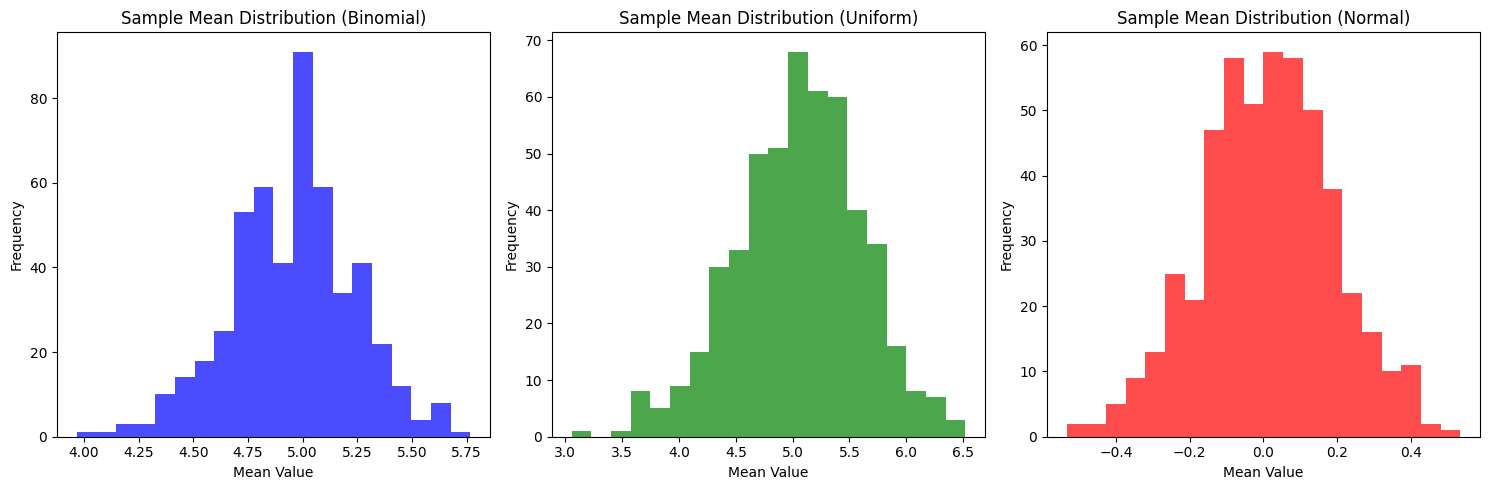

In [ ]:
# ÌëúÎ≥∏ Ï∂îÏ∂úÌï† ÌöüÏàòÏôÄ ÏûêÎ£åÌòï(sample_mean)Ï†ïÏùò
num_samples = 500
sample_size = 30
sample_means=  {
'Binomial' : [],
'Uniform' : [],
'Normal' : []
}
#numpy.choiceÏùÑ ÌÜµÌï¥ ÏÉòÌîåÏùò ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÏó¨ sample_means ÎîïÏÖîÎÑàÎ¶¨ ÏûêÎ£åÌòïÏóê Í∞ÅÍ∞Å Ï†ÄÏû•
for _ in range(num_samples):
    sample_means['Binomial'].append(np.mean(np.random.choice(binomial_data, sample_size, replace=True)))
    sample_means['Uniform'].append(np.mean(np.random.choice(uniform_data, sample_size, replace=True)))
    sample_means['Normal'].append(np.mean(np.random.choice(normal_data, sample_size, replace=True)))

print(f'Ïù¥Ìï≠Î∂ÑÌè¨ ÌëúÎ≥∏ÏóêÏÑú 30Í∞úÏî© ÎΩëÏïÑ ÌèâÍ∑†ÏùÑ ÎÇ∏ Í∞í {sample_means}')

#ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(sample_means["Binomial"], bins=20, color="blue", alpha=0.7)
plt.title("Sample Mean Distribution (Binomial)")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(sample_means["Uniform"], bins=20, color="green", alpha=0.7)
plt.title("Sample Mean Distribution (Uniform)")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(sample_means["Normal"], bins=20, color="red", alpha=0.7)
plt.title("Sample Mean Distribution (Normal)")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## 3.Ï†êÏ∂îÏ†ïÍ≥º Íµ¨Í∞ÑÏ∂îÏ†ï

#### Q3) Ï†êÏ∂îÏ†ïÍ≥º Íµ¨Í∞ÑÏ∂îÏ†ï
- Îã§ÏùåÍ≥º Í∞ôÏù¥ 2Í∞ÄÏßÄÏùò ÌëúÎ≥∏Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Í≥† Ìï†Îïå, ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º Í≥ÑÏÇ∞Ìï¥Î≥¥ÏÑ∏Ïöî
- ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ Í∑∏Î†§ ÌèâÍ∑†Ïù¥ Í∞ôÏßÄÎßå Î∂ÑÌè¨Îäî Îã§Î•¥Îã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï£ºÏÑ∏Ïöî

- `mean1`, `std1`: ÌëúÎ≥∏ 1Î≤àÏùò ÌÜµÍ≥ÑÎüâ
- `mean2`, `std2`: ÌëúÎ≥∏ 2Î≤àÏùò ÌÜµÍ≥ÑÎüâ

ÌïµÏã¨Î©îÏÑ∏ÏßÄÎäî Ï†êÏ∂îÏ†ïÏùÄ mean(ÌèâÍ∑†)ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Î≥¥Ïó¨Ï£ºÍ≥†,  Íµ¨Í∞ÑÏ∂îÏ†ïÏùÄ confidence interval(Ïã†Î¢∞Íµ¨Í∞Ñ)ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Î≥¥Ïó¨Ï§å.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data1 = [48, 49, 50, 51, 52, 47, 53, 49, 50, 51, 50, 49, 50, 51, 50, 48, 49, 51, 52, 50]  # Low variance
data2 = [30, 40, 50, 60, 70, 20, 80, 45, 55, 65, 35, 75, 25, 85, 50, 60, 40, 70, 20, 90]  # High variance

Data 1 ÌèâÍ∑† = 50.00, ÌëúÏ§ÄÌé∏Ï∞® = 1.49
Data 2 ÌèâÍ∑† = 53.25, ÌëúÏ§ÄÌé∏Ï∞® = 21.35


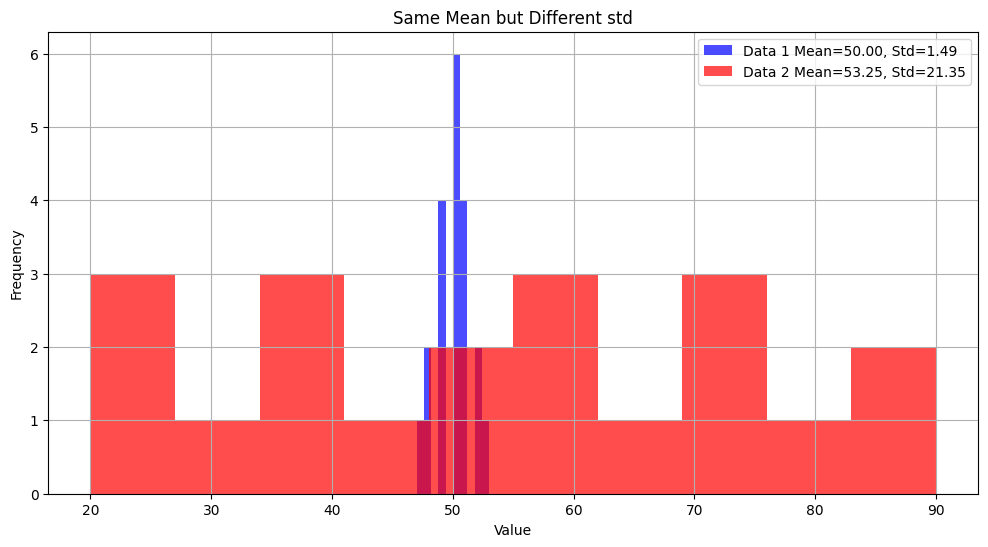

In [ ]:
# Îã®ÏàúÏßëÍ≥Ñ Í≥ÑÏÇ∞
# ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞   ÏûêÏú†ÎèÑ Ïã†Í≤ΩÏì∞Í∏∞
mean1, std1 = np.mean(data1), np.std(data1, ddof=1)
mean2, std2 = np.mean(data2), np.std(data2, ddof=1)

# Í∞í Ï∂úÎ†•
print(f"Data 1 ÌèâÍ∑† = {mean1:.2f}, ÌëúÏ§ÄÌé∏Ï∞® = {std1:.2f}")
print(f"Data 2 ÌèâÍ∑† = {mean2:.2f}, ÌëúÏ§ÄÌé∏Ï∞® = {std2:.2f}")


# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))

plt.hist(data1, bins=10, alpha=0.7, label=f"Data 1 Mean={mean1:.2f}, Std={std1:.2f}", color="blue")
plt.hist(data2, bins=10, alpha=0.7, label=f"Data 2 Mean={mean2:.2f}, Std={std2:.2f}", color="red")

plt.title("Same Mean but Different std")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

## 4.Ïã†Î¢∞Íµ¨Í∞Ñ
- Îã§ÏùåÏùÄ ÌïúÍµ≠ÎÇ®ÏûêÏùò ÌÇ§Î•º ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌïòÏó¨ ÌëúÎ≥∏ÏùÑ ÏÉùÏÑ±ÌïòÏòÄÎã§. Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ TÎ∂ÑÌè¨Í∏∞Î∞òÍ≥º Î∂ÄÌä∏Ïä§Ìä∏Îû© Í∏∞Î∞òÏúºÎ°ú Íµ¨ÌòÑÌï¥Î≥¥Ïûê
- Hint) tÌÜµÍ≥ÑÎüâÏùÄ `stats.t.ppf`Ìï®ÏàòÎ°ú Íµ¨ÌòÑÎêòÏñ¥ÏûàÏùå. Ex) 95%Ïã†Î¢∞Íµ¨Í∞ÑÏùò ÌÜµÍ≥ÑÎüâ `stats.t.ppf(1.95/2, df = n-1)`

#### Q4) tÎ∂ÑÌè¨ Í∏∞Î∞ò Ïã†Î¢∞Íµ¨Í∞ÑÍ≥ÑÏÇ∞

- Latex: Í∏∞Ìò∏Î•º ÌÜµÌï¥ÏÑú ÏàòÏãùÏùÑ Ïì∞ÎäîÎ∞©Î≤ï
- Î™®Î∂ÑÏÇ∞ÏùÑ ÏïåÎïå($\sigma$ Known)

- $\bar{x} - 1.96 * \frac{\sigma}{\sqrt(n)} <= \mu <= \bar{x} + 1.96 * \frac{\sigma}{\sqrt(n)}$

- Î™®Î∂ÑÏÇ∞ÏùÑ Î™®Î•ºÎïåÎïå($\sigma$ UnKnown)

- $\bar{x} -t_{\alpha/2, n-1} * \frac{\sigma}{\sqrt(n)} <= \mu <= \bar{x} + t_{\alpha/2, n-1}* \frac{\sigma}{\sqrt(n)}$

Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞Ïãú "tÎ∂ÑÌè¨ Í∏∞Î∞ò"ÏùÑ Ïì∞Îäî Í≤ΩÏö∞Îäî,
 1. Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏûàÏùÑ Îïå
 2. ÌëúÎ≥∏ ÌÅ¨Í∏∞Í∞Ä  30Î≥¥Îã§ ÏûëÏúºÎ©¥ÏÑú Î™®ÏßëÎã®Ïùò ÌëúÏ§ÄÌé∏Ï∞®Î•º Î™®Î•º Îïå
 3. ÌèâÍ∑†Ïóê ÎåÄÌïú Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ Íµ¨Ìï† Îïå

In [ ]:
stats.t.ppf(0.975, 19)

np.float64(2.093024054408263)

In [ ]:
import numpy as np
from scipy import stats

korean_men_heights = [
    170, 172, 174, 168, 176, 175, 169, 171, 173, 177,
    165, 180, 178, 174, 172, 173, 169, 168, 176, 175
]

In [ ]:
#Í∞ïÏÇ¨Îãò ÎãµÏïà 1) stats.t.interval Ìï®ÏàòÏù¥Ïö©ÌïòÍ∏∞ (ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä ÏïÑÎãå ÌëúÏ§Ä Ïò§Ï∞®Î•º ÎÑ£Ïñ¥Ïïº Ìï®ÏùÑ Ïú†Ïùò)

df = len(korean_men_heights) -1
_mean = np.mean(korean_men_heights)
_std = np.std(korean_men_heights, ddof = 1)  / np.sqrt(len(korean_men_heights))
print(_mean, _std)
stats.t.interval(0.95, df = df, loc = _mean, scale = _std  )

172.75 0.8549392099041773


(np.float64(170.96059166861377), np.float64(174.53940833138623))

In [ ]:
confidence_level = 0.95  # Define the confidence level (e.g., 0.95 for 95%)
(1 + confidence_level) / 2

0.975

In [ ]:
#Í∞ïÏÇ¨Îãò ÎãµÏïà 2) ÏãùÎåÄÎ°ú Íµ¨ÌòÑÌïòÍ∏∞
# ÌëúÎ≥∏ ÌèâÍ∑†Íµ¨ÌïòÍ∏∞
sample_mean = np.mean(korean_men_heights)
sample_std = np.std(korean_men_heights, ddof=1)  # ddof=1 for sample std

# Îç∞Ïù¥ÌÑ∞ÏÇ¨Ïù¥Ï¶à
n = len(korean_men_heights)

# ÌëúÏ§ÄÏò§Ï∞® Íµ¨ÌïòÍ∏∞(ÌëúÏ§ÄÌé∏Ï∞® ÎÇòÎàÑÍ∏∞ Îç∞Ïù¥ÌÑ∞Í∞ØÏàòÏùò Ï†úÍ≥±Í∑º)
standard_error = sample_std / np.sqrt(n)

# 95% Ïã†Î¢∞Íµ¨Í∞Ñ Íµ¨ÌïòÍ∏∞
confidence_level = 0.95
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)  # t critical value
margin_of_error = t_critical * standard_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print results
print("Point and Interval Estimation for Korean Men's Height:")
print(f"Sample Mean: {sample_mean:.2f} cm")
print(f"Sample Standard Deviation: {sample_std:.2f} cm")
print(f"Sample Size: {n}")
print(f"Standard Error: {standard_error:.2f} cm")
print(f"Margin of Error: {margin_of_error:.2f} cm")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

Point and Interval Estimation for Korean Men's Height:
Sample Mean: 172.75 cm
Sample Standard Deviation: 3.82 cm
Sample Size: 20
Standard Error: 0.85 cm
Margin of Error: 1.79 cm
95% Confidence Interval: (170.96, 174.54)


In [ ]:
#ÎÇ¥Í∞Ä Ï†ïÎ¶¨Ìïú Í≤É
#scipy.t.interval

# ÌëúÎ≥∏ ÌèâÍ∑†Íµ¨ÌïòÍ∏∞
sample_mean = np.mean(korean_men_heights)

# Îç∞Ïù¥ÌÑ∞ÏÇ¨Ïù¥Ï¶à
sample_size = len(korean_men_heights)
n = sample_size

# ÌëúÎ≥∏ ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
sample_std = np.std(korean_men_heights, ddof=1)

# ÌëúÏ§ÄÏò§Ï∞® Íµ¨ÌïòÍ∏∞(ÌëúÏ§ÄÌé∏Ï∞® ÎÇòÎàÑÍ∏∞ Îç∞Ïù¥ÌÑ∞Í∞ØÏàòÏùò Ï†úÍ≥±Í∑º)
standard_error = np.std(korean_men_heights, ddof=1) / np.sqrt(n)

# Margin of Error Í≥ÑÏÇ∞
margin_of_error = 1.96 * standard_error

# 95% Ïã†Î¢∞Íµ¨Í∞Ñ Íµ¨ÌïòÍ∏∞
confidence_interval = stats.t.interval(0.95, df = n-1, loc = sample_mean, scale = standard_error)

# Print results
print("Point and Interval Estimation for Korean Men's Height:")
print(f"Sample Mean: {sample_mean:.2f} cm")
print(f"Sample Standard Deviation: {sample_std:.2f} cm")
print(f"Sample Size: {n}")
print(f"Standard Error: {standard_error:.2f} cm")
print(f"Margin of Error: {margin_of_error:.2f} cm")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

Point and Interval Estimation for Korean Men's Height:
Sample Mean: 172.75 cm
Sample Standard Deviation: 3.82 cm
Sample Size: 20
Standard Error: 0.85 cm
Margin of Error: 1.68 cm
95% Confidence Interval: (170.96, 174.54)


### Q5) Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïë Í∏∞Î∞ò Ïã†Î¢∞Íµ¨Í∞Ñ
- `sample_mean`: ÌëúÎ≥∏-ÌèâÍ∑†
- `sample_std`: ÌëúÎ≥∏-ÌëúÏ§ÄÌé∏Ï∞®
- `n`: ÌëúÎ≥∏Ïùò Í∞ØÏàò(20)
- `n_bootstraps`: Î∂ÄÌä∏Ïä§Ìä∏Îû© ÌëúÎ≥∏Ïùò Í∞ØÏàò(10000)
- `bootstrap_means`: Î∂ÄÌä∏Ïä§Ìä∏Îû© ÌëúÎ≥∏ Í∞ØÏàòÏùò ÌèâÍ∑†ÏùÑ Îã¥ÏùÑ Î¶¨Ïä§Ìä∏ ÏûêÎ£åÌòï

Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞Ïãú BootstrapingÏùÑ Ïì∞Îäî Í≤ΩÏö∞Îäî,
1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏùÑ Îïå (ex: ÎπÑÎåÄÏπ≠, Ïù¥ÏÉÅÏπò ÎßéÏùå)
2. Î≥µÏû°Ìïú ÌÜµÍ≥ÑÎüâÏóê ÎåÄÌïú Ïã†Î¢∞Íµ¨Í∞Ñ (Ï§ëÏïôÍ∞í, ÌöåÍ∑ÄÍ≥ÑÏàò Îì±)ÏùÑ Íµ¨Ìï† Îïå
3. Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä ÎÑàÎ¨¥ ÏûëÏßÄ ÏïäÎã§Î©¥ Ïú†Ïó∞ÌïòÍ≥† Í∞ïÎ†•Ìïú Î∞©Î≤ï
4. ÎπÑÎ™®ÏàòÏ†Å Î∞©Î≤ïÏù¥ÎØÄÎ°ú Îçî ÏùºÎ∞òÏ†ÅÏù∏ ÏÉÅÌô©Ïóê Ï†ÅÏö© Í∞ÄÎä•

In [ ]:
#Í∞ïÏÇ¨Îãò ÎãµÏïà
# ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®
sample_mean = np.mean(korean_men_heights)
sample_std = np.std(korean_men_heights, ddof=1)  # ddof=1 for sample std

# Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïë ÌååÎùºÎØ∏ÌÑ∞ Ï†ïÌïòÍ∏∞
n = len(korean_men_heights)
n_bootstraps = 10000
bootstrap_means = []
sample_size  = 30

#Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïë ÏãúÌñâ
np.random.seed(42)
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(korean_men_heights, size=sample_size, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïëÏúºÎ°ú Ïã†Î¢∞Íµ¨Í∞Ñ Íµ¨ÌïòÍ∏∞
confidence_level = 0.95
lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100) # 2.5%
upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100) # 97.5%
bootstrap_confidence_interval = (lower_bound, upper_bound)

# Í≤∞Í≥ºÏ∂úÎ†•
print("Bootstrap Confidence Interval for Korean Men's Height:")
print(f"Sample Mean: {sample_mean:.2f} cm")
print(f"Sample Standard Deviation: {sample_std:.2f} cm")
print(f"95% Confidence Interval (Bootstrap): ({bootstrap_confidence_interval[0]:.2f}, {bootstrap_confidence_interval[1]:.2f})")

Bootstrap Confidence Interval for Korean Men's Height:
Sample Mean: 172.75 cm
Sample Standard Deviation: 3.82 cm
95% Confidence Interval (Bootstrap): (171.40, 174.10)


In [ ]:
#ÎÇ¥Í∞Ä Ïç®Î≥∏ Í±∞
# ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®
sample_mean = np.mean(korean_men_heights)
sample_std = np.std(korean_men_heights, ddof = 1)

# Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïë ÌååÎùºÎØ∏ÌÑ∞ Ï†ïÌïòÍ∏∞
np.random.seed(42)
n_bootstraps = 10000 # Î∞òÎ≥µÌöüÏàò
sample_size = 30 # sample size
bootstrap_means = []  # Í∞Å Î∂ÄÌä∏Ïä§Ìä∏Îû© ÏÉòÌîåÏùò ÌèâÍ∑† Ï†ÄÏû•

#Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïë ÏãúÌñâ
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(korean_men_heights, size=len(korean_men_heights), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

#ÏùºÎ∂Ä Î∂ÄÌä∏Ïä§Ìä∏Îû©Ïùò ÌèâÍ∑† ÌôïÏù∏ (Ï≤´ 5Í∞ú ÌôïÏù¥)
print(bootstrap_means[:5])


# Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïëÏúºÎ°ú Ïã†Î¢∞Íµ¨Í∞Ñ Íµ¨ÌïòÍ∏∞
bootstrap_confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])


# Í≤∞Í≥ºÏ∂úÎ†•
print("Bootstrap Confidence Interval for Korean Men's Height:")
print(f"Sample Mean: {sample_mean:.2f} cm")
print(f"Sample Standard Deviation: {sample_std:.2f} cm")
print(f"95% Confidence Interval (Bootstrap): ({bootstrap_confidence_interval[0]:.2f}, {bootstrap_confidence_interval[1]:.2f})")

[np.float64(171.9), np.float64(173.0), np.float64(172.25), np.float64(172.85), np.float64(172.45)]
Bootstrap Confidence Interval for Korean Men's Height:
Sample Mean: 172.75 cm
Sample Standard Deviation: 3.82 cm
95% Confidence Interval (Bootstrap): (171.15, 174.35)


In [ ]:
(1- 0.95)/2 *100

2.500000000000002

In [ ]:
(1+0.95)/2*100

97.5

In [ ]:
np.percentile(bootstrap_means,0.025)

np.float64(169.8249875)

## 5.Í≤ÄÏ†ïÏã§Ïäµ

### 5.1)ZÍ≤ÄÏ†ï

- Ìïú ÌöåÏÇ¨ÏóêÏÑú Í≥†Í∞ù ÎßåÏ°±ÎèÑ ÏÑ§Î¨∏Ï°∞ÏÇ¨Î•º ÏãúÌñâ. Ïù¥Ï†Ñ ÏÑ§Î¨∏Ï°∞ÏÇ¨ Í≤∞Í≥º ÌèâÍ∑† ÎßåÏ°±ÎèÑÍ∞Ä 8Ï†ê(ùúá_0=8), ÌëúÏ§Ä Ìé∏Ï∞®Îäî 1.5Ï†ê(ùúé = 1.5) ÏïåÎ†§Ï†∏ÏûàÏùå.  ÏÉàÎ°úÏö¥ ÏÑúÎπÑÏä§ ÎèÑÏûÖ ÌõÑ 100Î™ÖÏùò Í≥†Í∞ùÏùò ÎåÄÏÉÅÏúºÎ°ú ÌëúÎ≥∏ Ï°∞ÏÇ¨Î•º ÌñàÎçîÎãà ÌèâÍ∑† ÎßåÏ°±ÎèÑÍ∞Ä 8.2Ï†ê(ùë•¬†ÃÖ = 8.2). ÏÉàÎ°úÏö¥ ÏÑúÎπÑÏä§ Ï†ïÏ±ÖÏù¥ Í≥†Í∞ùÏùò ÎßåÏ°±ÎèÑÎ•º Ïú†ÏùòÎØ∏ÌïòÍ≤å Ìñ•ÏÉÅÏãúÏº∞ÎäîÍ∞Ä?


- Z-scoreÏùò Í≥ÑÏÇ∞:  $\frac{\bar{x} - \mu_0}{\sigma /\sqrt(n)}$
- Z=1.33Ïùò Í≥ÑÏÇ∞: `norm.cdf`Ïù¥Ïö©
    - ex) norm.cdf(1.33): Z = 1.33ÍπåÏßÄÏùò ÎàÑÏ†ÅÌôïÎ•†

In [ ]:
# Î∞©Î≤ïÎ°†: Î™®ÌëúÏ§ÄÌé∏Ï∞®Î•º ÏïàÎã§ -> ZÍ≤ÄÏ†ï , ÏùºÌëúÎ≥∏ Í≤ÄÏ¶ù(ÌïòÎÇòÏùò Í∑∏Î£πÏù¥ ÌäπÏ†ï Í∞íÏùÑ Í∞ñÎäîÍ∞Ä)
# Í∞ÄÏÑ§
# H0: ÏÑúÎπÑÏä§Ï†ïÏ±ÖÏù¥ ÌèâÏ†êÏóê ÏòÅÌñ•Ïù¥ ÏóÜÎã§.
# H1: Ï†ïÏ±ÖÏóê ÏòÅÌñ•Ïù¥ ÏûàÎã§.
# Z-score : ÏûêÏó∞Ïä§ÎüΩÍ≤å Í≤∞Ï†ïÎêòÎäî Î∂ÄÎ∂ÑÏù¥Îùº Ìï®Ïóê Îß°Í≤®ÏÑú Í≥ÑÏÇ∞ÏãúÌÇ¥

In [ ]:
from scipy.stats import norm
import numpy as np

# Îç∞Ïù¥ÌÑ∞ ÏÑ§Ï†ï
mu_0 = 8  # Î™®ÏßëÎã® ÌèâÍ∑†
sigma = 1.5  # Î™®ÏßëÎã® ÌëúÏ§ÄÌé∏Ï∞®
n = 100  # ÌëúÎ≥∏ ÌÅ¨Í∏∞
x_bar = 8.2  # ÌëúÎ≥∏ ÌèâÍ∑†

# ÌëúÏ§ÄÏò§Ï∞® Í≥ÑÏÇ∞
SE = sigma / np.sqrt(n)

# Z-ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞
z_stat = (x_bar - mu_0) / SE

# ÏñëÏ∏° Í≤ÄÏ†ï p-value Í≥ÑÏÇ∞
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Z-ÌÜµÍ≥ÑÎüâ: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Ïú†ÏùòÏàòÏ§Ä ÏÑ§Ï†ï
alpha = 0.05
if p_value < alpha:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§. ÏÉàÎ°úÏö¥ Ï†ïÏ±ÖÏù¥ ÎßåÏ°±ÎèÑÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§.")
else:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ Î™ªÌï©ÎãàÎã§. ÏÉàÎ°úÏö¥ Ï†ïÏ±ÖÏù¥ ÎßåÏ°±ÎèÑÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Ï¶ùÍ±∞Í∞Ä Î∂ÄÏ°±Ìï©ÎãàÎã§.")


Z-ÌÜµÍ≥ÑÎüâ: 1.33
P-value: 0.1824
Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ Î™ªÌï©ÎãàÎã§. ÏÉàÎ°úÏö¥ Ï†ïÏ±ÖÏù¥ ÎßåÏ°±ÎèÑÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Ï¶ùÍ±∞Í∞Ä Î∂ÄÏ°±Ìï©ÎãàÎã§.


### Q6) ZÍ≤ÄÏ†ï
- Ìïú ÌöåÏÇ¨Îäî ÏÉàÎ°úÏö¥ Í¥ëÍ≥† Ï∫†ÌéòÏù∏Ïùò Ìö®Í≥ºÎ•º ÌèâÍ∞ÄÌïòÍ∏∞ÏúÑÌï¥ÏÑú Ïã§ÌóòÏùÑ ÏßÑÌñâÌñàÏäµÎãàÎã§. Ïù¥Ï†Ñ Í¥ëÍ≥† Ï∫†Ìå®Ïù∏Ïùò ÌèâÍ∑† ÌÅ¥Î¶≠Ïú®($\mu_0$)ÏùÄ 3%Î°ú ÏïåÎ†§Ï†∏ ÏûàÏúºÎ©∞, ÌëúÏ§ÄÌé∏Ï∞®($\sigma $)Îäî 0.5%Î°ú ÏïåÎ†§Ï†∏ ÏûàÏäµÎãàÎã§. ÏÉàÎ°úÏö¥ Í¥ëÍ≥† Ï∫†ÌéòÏù∏ÏùÑ ÌÜµÌï¥ n= 200Ïùò ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌïú Í≤∞Í≥º ÌèâÍ∑† ÌÅ¥Î¶≠Ïú®($\bar{x}$)Îäî 3.4%Î°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.
- Ïù¥ Îïå ÏÉàÎ°úÏö¥ Í¥ëÍ≥† Ï∫†ÌéòÏù∏Ïù¥ ÌÅ¥Î¶≠Ïú®Ïóê Ïú†ÏùòÎØ∏Ìïú Î≥ÄÌôîÎ•º Í∞ÄÏ†∏ÏôîÎäîÏßÄ ÏñëÏ∏° Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î∂ÑÏÑùÌïòÏÑ∏Ïöî.

- `mu_0`: Ïù¥Ï†Ñ Í¥ëÍ≥† Ï∫†ÌéòÏù∏ ÌèâÍ∑† ÌÅ¥Î¶≠Ïú®
- `sigma`: Î™®ÏßëÎã® ÌëúÏ§ÄÌé∏Ï∞®
- `n`: ÌëúÎ≥∏Ïùò ÌÅ¨Í∏∞
- `x_bar`: ÏÉàÎ°úÏö¥ Í¥ëÍ≥† Ï∫†ÌéòÏù∏Ïùò ÌèâÍ∑† ÌÅ¥Î¶≠Ïú®

In [ ]:
from scipy.stats import norm
import numpy as np

# Îç∞Ïù¥ÌÑ∞ ÏÑ§Ï†ï
mu_0 = 0.03  # Ïù¥Ï†Ñ Í¥ëÍ≥† Ï∫†ÌéòÏù∏Ïùò ÌèâÍ∑† ÌÅ¥Î¶≠Ïú®
sigma = 0.005  # Î™®ÏßëÎã® ÌëúÏ§ÄÌé∏Ï∞® (0.5%)
n = 200  # ÌëúÎ≥∏ ÌÅ¨Í∏∞
x_bar = 0.034  # ÏÉàÎ°úÏö¥ Í¥ëÍ≥† Ï∫†ÌéòÏù∏Ïùò ÌèâÍ∑† ÌÅ¥Î¶≠Ïú®

# ÌëúÏ§ÄÏò§Ï∞® Í≥ÑÏÇ∞
SE = sigma / np.sqrt(n)

# Z-ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞
z_stat = (x_bar - mu_0) / SE

# ÏñëÏ∏° Í≤ÄÏ†ï p-value Í≥ÑÏÇ∞
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Z-ÌÜµÍ≥ÑÎüâ: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Ïú†ÏùòÏàòÏ§Ä ÏÑ§Ï†ï
alpha = 0.05
if p_value < alpha:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§. ÏÉàÎ°úÏö¥ Í¥ëÍ≥† Ï∫†ÌéòÏù∏Ïù¥ ÌÅ¥Î¶≠Ïú®Ïóê Ïú†ÏùòÎØ∏Ìïú Î≥ÄÌôîÎ•º Í∞ÄÏ†∏ÏôîÏäµÎãàÎã§.")
else:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ Î™ªÌï©ÎãàÎã§. ÏÉàÎ°úÏö¥ Í¥ëÍ≥† Ï∫†ÌéòÏù∏Ïù¥ ÌÅ¥Î¶≠Ïú®Ïóê Ïú†ÏùòÎØ∏Ìïú Î≥ÄÌôîÎ•º Í∞ÄÏ†∏ÏôîÎã§Îäî Ï¶ùÍ±∞Í∞Ä Î∂ÄÏ°±Ìï©ÎãàÎã§.")


Z-ÌÜµÍ≥ÑÎüâ: 11.31
P-value: 0.0000
Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§. ÏÉàÎ°úÏö¥ Í¥ëÍ≥† Ï∫†ÌéòÏù∏Ïù¥ ÌÅ¥Î¶≠Ïú®Ïóê Ïú†ÏùòÎØ∏Ìïú Î≥ÄÌôîÎ•º Í∞ÄÏ†∏ÏôîÏäµÎãàÎã§.


tÍ≤ÄÏ†ï: ÎèÖÎ¶Ω Ïù¥ÌëúÎ≥∏


Ìïú ÌöåÏÇ¨Í∞Ä ÎëêÍ∞ÄÏßÄ Í¥ëÍ≥† Ï∫†ÌéòÏù∏(A,B)Ïùò Ï†ÑÌôòÏú®(CVR)ÏùÑ ÎπÑÍµêÌïòÍ≥†Ïûê ÌïúÎã§.

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Í∑∏Î£π AÏôÄ Í∑∏Î£π BÏùò Ï†ÑÌôòÏú® Îç∞Ïù¥ÌÑ∞
group_a = np.array([0.045, 0.052, 0.048, 0.055, 0.049, 0.051, 0.047, 0.053, 0.050, 0.046,
                   0.054, 0.049, 0.052, 0.048, 0.055, 0.051, 0.047, 0.053, 0.050, 0.046,
                   0.054, 0.049, 0.052, 0.048, 0.055, 0.051, 0.047, 0.053, 0.050, 0.046])

group_b = np.array([0.056, 0.060, 0.052, 0.058, 0.054, 0.057, 0.053, 0.059, 0.056, 0.052,
                   0.061, 0.055, 0.058, 0.054, 0.060, 0.057, 0.053, 0.059, 0.056, 0.052,
                   0.061, 0.055, 0.058, 0.054, 0.060, 0.057, 0.053, 0.059, 0.056, 0.052])


# ÎèÖÎ¶Ω Ïù¥ÌëúÎ≥∏ t-ÌÖåÏä§Ìä∏ ÏàòÌñâ
t_stat, p_value = ttest_ind(group_a, group_b, equal_var=True)  # Îì±Î∂ÑÏÇ∞ Í∞ÄÏ†ï

# Í≤∞Í≥º Ï∂úÎ†•
print(f"t-ÌÜµÍ≥ÑÎüâ: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Ïú†ÏùòÏàòÏ§Ä ÏÑ§Ï†ï
alpha = 0.05
if p_value < alpha:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§. Îëê Í∑∏Î£π Í∞Ñ ÌèâÍ∑†Ïóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")
else:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ Î™ªÌï©ÎãàÎã§. Îëê Í∑∏Î£π Í∞Ñ ÌèâÍ∑†Ïóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÎã§Îäî Ï¶ùÍ±∞Í∞Ä Î∂ÄÏ°±Ìï©ÎãàÎã§.")

t-ÌÜµÍ≥ÑÎüâ: -7.9099
p-value: 0.0000
Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§. Îëê Í∑∏Î£π Í∞Ñ ÌèâÍ∑†Ïóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.


In [ ]:
np.mean(group_a), np.mean(group_b)

(0.0502, 0.05623333333333333)

### Q7) tÍ≤ÄÏ†ï

- Îã§ÏùåÏùÄ Í∏∞Ï°¥ ÌéòÏù¥ÏßÄ AÏôÄ Í∞úÏÑ†Îêú ÌéòÏù¥ÏßÄ BÏóê ÎåÄÌïú Ï†ëÏÜçÎ•†ÏùÑ Ï∏°Ï†ïÌïú abtestÍ≤∞Í≥ºÏù¥Îã§.
- t-testÎ•º Ïù¥Ïö©ÌïòÏó¨ Îëê ÌéòÏù¥ÏßÄÍ∞Ñ Ï†ëÏÜçÎ•†Ïùò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ Í≤ÄÏ¶ùÌïòÎùº
- `time_a`: ÌéòÏù¥ÏßÄ AÏùò Îç∞Ïù¥ÌÑ∞
- `time_b`: ÌéòÏù¥ÏßÄ BÏùò Îç∞Ïù¥ÌÑ∞

In [ ]:
import pandas as pd
from scipy import stats
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/web_page_data.csv"
session_times = pd.read_csv(url)
session_times.head()

Page  Time
0  Page A  0.21
1  Page B  2.53
2  Page A  0.35
3  Page B  0.71
4  Page A  0.67

In [ ]:
session_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Page    36 non-null     object 
 1   Time    36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [ ]:
# Separate session times for Page A and Page B
time_a = session_times[session_times.Page == 'Page A'].Time
time_b = session_times[session_times.Page == 'Page B'].Time

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(time_a, time_b)

# Print the results
print("T-statistic:", t_statistic.round(2))
print("P-value:", p_value.round(2))

T-statistic: -1.12
P-value: 0.27


### 5.3) ABtest
- https://www.kaggle.com/datasets/zhangluyuan/ab-testing/data
- Ïã†Í∑ú ÌéòÏù¥ÏßÄÏóê Îî∞Î•∏ Ï†ÑÌôòÏú®Ïù¥ Ïú†ÏùòÎØ∏Ìïú Î≥ÄÌôîÍ∞Ä ÏûàÎäîÏßÄ Ï∏°Ï†ï
- Î≥ÄÏàò ÏÑ§Î™Ö
    - 'user_id' contains user ids
    - 'timestamp' is about when a session was
    - 'group' contains 2 variables: control and treatment
    - 'landing_page' is about what version of a site a user saw
    - 'converted' says us about user's behavior: if a user made a purchase (1) or not (0)

In [ ]:
import kagglehub
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
# Download latest version
path = kagglehub.dataset_download("zhangluyuan/ab-testing")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0])
df.head(3)

Path to dataset files: /kaggle/input/ab-testing


user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0

In [ ]:
pd.crosstab(df['group'], df['landing_page'])

landing_page  new_page  old_page
group                           
control           1928    145274
treatment       145311      1965

In [ ]:
#ÌòÑÏû¨ ÏÇ¨Ïù¥Ìä∏Ïùò Ï†ÑÌôòÏú®ÏùÄ 12%Ïù¥Í≥† 14%Î°ú Ïò¨Î¶¨Í≥† Ïã∂Îã§Í≥† Í∞ÄÏ†ï
#Ïù¥Î•º ÌÜµÌï¥ ÌïÑÏöîÌïú Ïù∏Íµ¨ÏàòÎ•º Í≥ÑÏÇ∞

effect_size = sms.proportion_effectsize(0.12, 0.14)    # Calculating effect size based on our expected rates

required_n = sms.NormalIndPower().solve_power(
    effect_size,
    power=0.8,  #power of a test (defualt is 0.8)
    alpha=0.05, #p-value
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number

print(required_n)

4433


In [ ]:
# Ìïú Ïú†Ï†ÄÍ∞Ä Ïó¨Îü¨Î≤àÏùò ÏÑ∏ÏÖòÏùÑ ÏÉùÏÑ±Ìï† Ïàò ÏûàÏùå. Ï§ëÎ≥µÏ†úÍ±∞
session_counts = df.user_id.value_counts()
double_users = session_counts[session_counts>1].index

double_users

Index([752737, 781280, 767913, 886060, 731779, 827432, 677313, 756804, 671874,
       741541,
       ...
       716103, 831390, 633243, 883524, 817288, 835630, 931722, 808992, 668683,
       866251],
      dtype='int64', name='user_id', length=3894)

In [ ]:
control_group = df.query('group == "control"').sample(required_n)
treatment_group = df.query('group == "treatment"').sample(required_n)

display(control_group.head())
display(treatment_group.head())

user_id                   timestamp    group landing_page  converted
210760   638963  2017-01-04 17:24:26.803556  control     old_page          0
185237   929750  2017-01-04 07:43:46.644813  control     old_page          0
151872   689756  2017-01-21 05:59:33.293436  control     old_page          0
264765   635946  2017-01-12 17:55:46.257964  control     old_page          1
131945   647562  2017-01-23 01:23:56.232279  control     old_page          0

user_id                   timestamp      group landing_page  converted
22124    712796  2017-01-07 20:57:38.013688  treatment     new_page          0
211241   766308  2017-01-19 07:30:11.539649  treatment     new_page          0
145111   808494  2017-01-18 06:44:02.009378  treatment     new_page          0
116096   702606  2017-01-23 00:38:56.289448  treatment     new_page          0
181318   866320  2017-01-08 04:56:40.591142  treatment     new_page          0

In [ ]:
ab_test = pd.concat([control_group, treatment_group], axis=0)
ab_test.reset_index(inplace=True, drop=True)
display(ab_test.head())
display(ab_test.group.value_counts())

user_id                   timestamp    group landing_page  converted
0   638963  2017-01-04 17:24:26.803556  control     old_page          0
1   929750  2017-01-04 07:43:46.644813  control     old_page          0
2   689756  2017-01-21 05:59:33.293436  control     old_page          0
3   635946  2017-01-12 17:55:46.257964  control     old_page          1
4   647562  2017-01-23 01:23:56.232279  control     old_page          0

group
control      4433
treatment    4433
Name: count, dtype: int64

In [ ]:
conversion_rates = ab_test.groupby('group')['converted']

std_p = lambda x: np.std(x, ddof=1)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=1)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']
conversion_rates.style.format('{:.3f}')

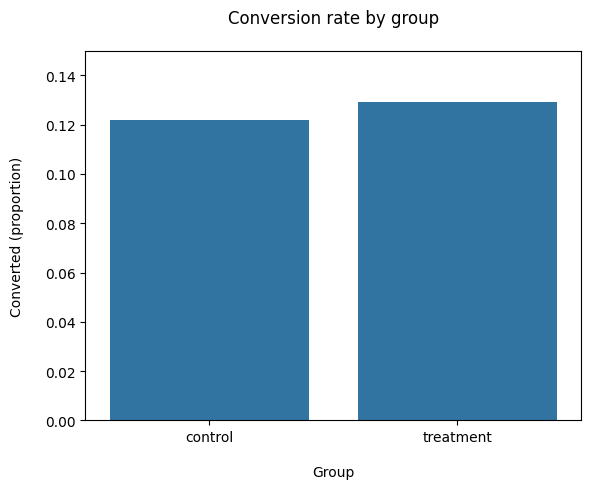

In [ ]:
sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)

plt.ylim(0, 0.15)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

In [ ]:
#Ïã§Ï†úÎ°ú Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥ºÏù∏ÏßÄ ÌôïÏù∏
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_conversion = ab_test.query('group == "control"')['converted']
treatment_conversion = ab_test.query('group == "treatment"')['converted']
nobs = [control_conversion.count(), treatment_conversion.count()]
successes = [control_conversion.sum(), treatment_conversion.sum()]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'95% Confidence interval for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'95% Confidence interval for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -1.03
p-value: 0.305
95% Confidence interval for control group: [0.112, 0.132]
95% Confidence interval for treatment group: [0.119, 0.139]


- Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ Î™ªÌïòÏó¨ ÏÉàÎ°úÏö¥ ÌéòÏù¥ÏßÄÍ∞Ä Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï†ÑÌôòÏú®ÏùÑ ÎÜíÎã§Îäî Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ Î™ªÌï®